In [107]:
import PIL as pil
from matplotlib import pyplot as plt
import numpy as np
import math
from datetime import datetime
import cv2

In [108]:
# Define some common functions
def img2array(img):
    nrow = img.size[1]
    ncol = img.size[0]
    img_map = img.load()
    myarray = np.zeros([nrow,ncol,3], dtype=np.uint8)
    for i in range(nrow):
        for j in range(ncol):
            myarray[i,j,0] = img_map[j,i][0]
            myarray[i,j,1] = img_map[j,i][1]
            myarray[i,j,2] = img_map[j,i][2]
    return myarray

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

mygauss = gaussian_kernel(5, sigma=1.4)

def applyGaussFilter(image, kernel):
    n, m = image.shape
    new_image = np.zeros([n,m])
    
    for i in range(0,n):
        for j in range(0,m):
            mysum = 0; 
            if i-2 >= 0 and i-2 < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i-2,j-2]*kernel[0,0]
            if i-2 >= 0 and i-2 < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i-2,j-1]*kernel[0,1]
            if i-2 >= 0 and i-2 < n and j >= 0 and j < m:
                mysum = mysum + image[i-2,j]*kernel[0,2]
            if i-2 >= 0 and i-2 < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i-2,j+1]*kernel[0,3]
            if i-2 >= 0 and i-2 < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i-2,j+2]*kernel[0,4]
            if i-1 >= 0 and i-1 < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i-1,j-2]*kernel[1,0]
            if i-1 >= 0 and i-1 < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i-1,j-1]*kernel[1,1]
            if i-1 >= 0 and i-1 < n and j >= 0 and j < m:
                mysum = mysum + image[i-1,j]*kernel[1,2]
            if i-1 >= 0 and i-1 < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i-1,j+1]*kernel[1,3]
            if i-1 >= 0 and i-1 < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i-1,j+2]*kernel[1,4]
            if i >= 0 and i < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i,j-2]*kernel[2,0]
            if i >= 0 and i < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i,j-1]*kernel[2,1]
            if i >= 0 and i < n and j >= 0 and j < m:
                mysum = mysum + image[i,j]*kernel[2,2]
            if i >= 0 and i < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i,j+1]*kernel[2,3]
            if i >= 0 and i < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i,j+2]*kernel[2,4]
            if i+1 >= 0 and i+1 < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i+1,j-2]*kernel[3,0]
            if i+1 >= 0 and i+1 < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i+1,j-1]*kernel[3,1]
            if i+1 >= 0 and i+1 < n and j >= 0 and j < m:
                mysum = mysum + image[i+1,j]*kernel[3,2]
            if i+1 >= 0 and i+1 < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i+1,j+1]*kernel[3,3]
            if i+1 >= 0 and i+1 < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i+1,j+2]*kernel[3,4]
            if i+2 >= 0 and i+2 < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i+2,j-2]*kernel[4,0]
            if i+2 >= 0 and i+2 < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i+2,j-1]*kernel[4,1]
            if i+2 >= 0 and i+2 < n and j >= 0 and j < m:
                mysum = mysum + image[i+2,j]*kernel[4,2]
            if i+2 >= 0 and i+2 < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i+2,j+1]*kernel[4,3]
            if i+2 >= 0 and i+2 < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i+2,j+2]*kernel[4,4]
            new_image[i,j] = mysum
                
    return new_image

def calculateGradient(img):
    m, n = img.shape
    Gx = np.zeros([m, n])
    Gy = np.zeros([m, n])
    G = np.zeros([m,n])
    theta = np.zeros([m,n])
    for i in range(1,m-1):
        for j in range(1,n-1):
            Gx[i, j] = 1.0*img[i+1,j-1] + 2.0*img[i+1,j] + 1.0*img[i+1,j+1] - 1.0*img[i-1,j-1] - 2.0*img[i-1,j] - 1.0*img[i-1,j+1]
            Gy[i, j] = - 1.0*img[i-1,j+1] - 2.0*img[i,j+1] - 1.0*img[i+1,j+1] + 1.0*img[i-1,j-1] + 2.0*img[i,j-1] + 1.0*img[i+1,j-1]
            G[i,j] = math.sqrt(Gx[i,j]*Gx[i,j]+Gy[i,j]*Gy[i,j])
            if Gy[i,j]!=0:
                theta[i,j] = math.atan(Gx[i,j]/Gy[i,j])
            
    return Gx,Gy,G,theta

def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

def doublethreshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    img_out = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(100)
    strong = np.int32(255)

    for i in range(0, M):
        for j in range(0, N):
            if img[i,j]>= highThreshold:
                img_out[i,j] = strong
            elif img[i,j] < highThreshold and img[i,j] >= lowThreshold:
                img_out[i,j] = weak
            else:
                img_out[i,j] = 0
    
    return (img_out, weak, strong)

def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    img_out = np.copy(img)
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img_out[i,j] == weak):
                try:
                    if ((img_out[i+1, j-1] == strong) or (img_out[i+1, j] == strong) or (img_out[i+1, j+1] == strong)
                        or (img_out[i, j-1] == strong) or (img_out[i, j+1] == strong)
                        or (img_out[i-1, j-1] == strong) or (img_out[i-1, j] == strong) or (img_out[i-1, j+1] == strong)):
                        img_out[i, j] = strong
                    else:
                        img_out[i, j] = 0
                except IndexError as e:
                    pass
    return img_out

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [109]:
def img2array(img):
    nrow = img.size[1]
    ncol = img.size[0]
    img_map = img.load()
    myarray = np.zeros([nrow,ncol,3], dtype=np.uint8)
    for i in range(nrow):
        for j in range(ncol):
            myarray[i,j,0] = img_map[j,i][0]
            myarray[i,j,1] = img_map[j,i][1]
            myarray[i,j,2] = img_map[j,i][2]
    return myarray

def RGB2xyz(img):
    myraw = img2array(img)
    myscale = np.divide(myraw, 255.0)
    myshape = np.shape(myscale)
    myrgb = np.zeros([myshape[0], myshape[1], myshape[2]])
    for i in range(myshape[0]):
        for j in range(myshape[1]):
            if myscale[i,j,0] <= 0.04045:
                myrgb[i,j,0] = myscale[i,j,0]/12.92;
            else:
                myrgb[i,j,0] = np.power((myscale[i,j,0] + 0.055)/1.055,2.4)
                
            if myscale[i,j,1] <= 0.04045:
                myrgb[i,j,1] = myscale[i,j,1]/12.92;
            else:
                myrgb[i,j,1] = np.power((myscale[i,j,1] + 0.055)/1.055,2.4)
                
            if myscale[i,j,2] <= 0.04045:
                myrgb[i,j,2] = myscale[i,j,2]/12.92;
            else:
                myrgb[i,j,2] = np.power((myscale[i,j,2] + 0.055)/1.055,2.4)
                
    m = [[0.4125, 0.2128, 0.0194],
         [0.3578, 0.7157, 0.1193],
         [0.1805, 0.0722, 0.9503]]
    myXYZ = np.zeros([myshape[0], myshape[1], myshape[2]])
    for i in range(myshape[0]):
        for j in range(myshape[1]):
            myXYZ[i,j] = np.matmul(myrgb[i,j], m)
    myxyz = np.zeros([myshape[0], myshape[1], myshape[2]])
    for i in range(myshape[0]):
        for j in range(myshape[1]):
            mysum = myXYZ[i,j,0] + myXYZ[i,j,1] + myXYZ[i,j,2]
            myxyz[i,j,0] = myXYZ[i,j,0]/mysum
            myxyz[i,j,1] = myXYZ[i,j,1]/mysum
            myxyz[i,j,2] = myXYZ[i,j,2]/mysum
    return myxyz

x = np.linspace(0, 1, 100)
y = 0.8 - x
y1 = np.ones([100])*0.35

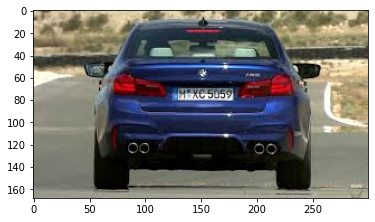

In [110]:
#img_car1 = pil.Image.open("../Image/car_no_light_1280x720.jpg")
img_car1 = pil.Image.open("../Image/blue_car_02.jpg")
myraw = img2array(img_car1)
myimg = pil.Image.fromarray(myraw)
myimg_map = myimg.load()
plt.imshow(myimg)

/var/folders/q9/z8dpwd852j55t0l70g4hcqk00000gn/T/ipykernel_12910/1778567755.py:46: RuntimeWarning: invalid value encountered in double_scalars
  myxyz[i,j,0] = myXYZ[i,j,0]/mysum
/var/folders/q9/z8dpwd852j55t0l70g4hcqk00000gn/T/ipykernel_12910/1778567755.py:47: RuntimeWarning: invalid value encountered in double_scalars
  myxyz[i,j,1] = myXYZ[i,j,1]/mysum
/var/folders/q9/z8dpwd852j55t0l70g4hcqk00000gn/T/ipykernel_12910/1778567755.py:48: RuntimeWarning: invalid value encountered in double_scalars
  myxyz[i,j,2] = myXYZ[i,j,2]/mysum


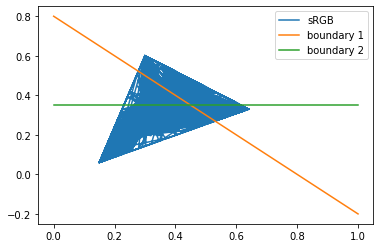

In [111]:
myxyz = RGB2xyz(img_car1)
myshape = myxyz.shape
myx = np.zeros([myshape[0]*myshape[1]])
myy = np.zeros([myshape[0]*myshape[1]])
for i in range(myshape[0]):
    for j in range(myshape[1]):
        myx[i*myshape[1] + j] = myxyz[i,j,0]
        myy[i*myshape[1] + j] = myxyz[i,j,1]
        
fig, ax = plt.subplots(1,1)
ax.plot(myx, myy)
ax.plot(x, y)
ax.plot(x, y1)
ax.legend(['sRGB','boundary 1', 'boundary 2'])

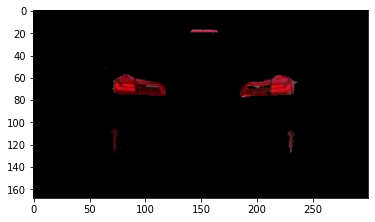

In [112]:
for i in range(myimg.size[0]):
    for j in range(myimg.size[1]):
        if myy[j*myshape[1] + i] >= 0.35 or myy[j*myshape[1] + i] + myx[j*myshape[1] + i] <= 0.7:
            myimg_map[i,j] = (0,0,0)
plt.imshow(myimg)

In [113]:
# Change to gray scale image
start_time = datetime.now()
myimgarr = img2array(myimg)
mygrayimg = rgb2gray(myimgarr)
end_time = datetime.now()
print('Duration - {}: {}'.format("rgb2gray", end_time - start_time))

Duration - rgb2gray: 0:00:00.060227


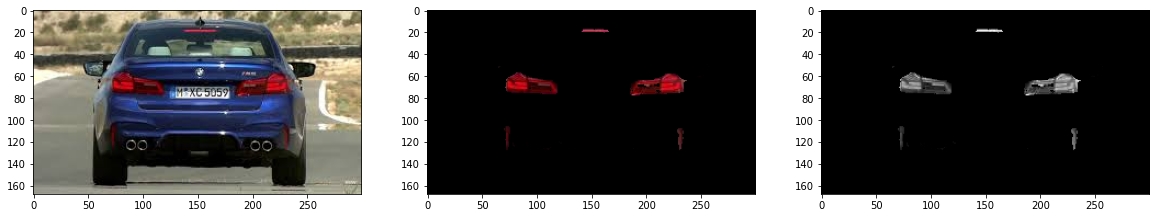

In [114]:
# Original vs. Raw rear light extract vs. Grayscale
f, axarr = plt.subplots(1,3, figsize=(20, 20))
axarr[0].imshow(myraw)
axarr[1].imshow(myimgarr)
axarr[2].imshow(mygrayimg, cmap='gray')

In [115]:
# Apply Gaussian Filter
start_time = datetime.now()
mygraysmoothimg=applyGaussFilter(mygrayimg, mygauss)
end_time = datetime.now()
print('Duration - {}: {}'.format("ApplyGaussFilter", end_time - start_time))
# Calculate Gradients and Angles
start_time = datetime.now()
Gx, Gy, G, theta = calculateGradient(mygraysmoothimg)
end_time = datetime.now()
print('Duration - {}: {}'.format("calculateGradient", end_time - start_time))
# Calculate Non Max Suppression
start_time = datetime.now()
NMS_G = non_max_suppression(G, theta)
end_time = datetime.now()
print('Duration - {}: {}'.format("non_max_suppression", end_time - start_time))
# Calculate double threshold
start_time = datetime.now()
mythreshold, weak, strong = doublethreshold(NMS_G, 0.001, 0.1)
end_time = datetime.now()
print('Duration - {}: {}'.format("threshold", end_time - start_time))
# Calculate hysteresis
start_time = datetime.now()
myhysteresis = hysteresis(mythreshold, weak)
end_time = datetime.now()
print('Duration - {}: {}'.format("hysteresis", end_time - start_time))

Duration - ApplyGaussFilter: 0:00:00.807108
Duration - calculateGradient: 0:00:00.293049
Duration - non_max_suppression: 0:00:00.086803
Duration - threshold: 0:00:00.359864
Duration - hysteresis: 0:00:00.011647


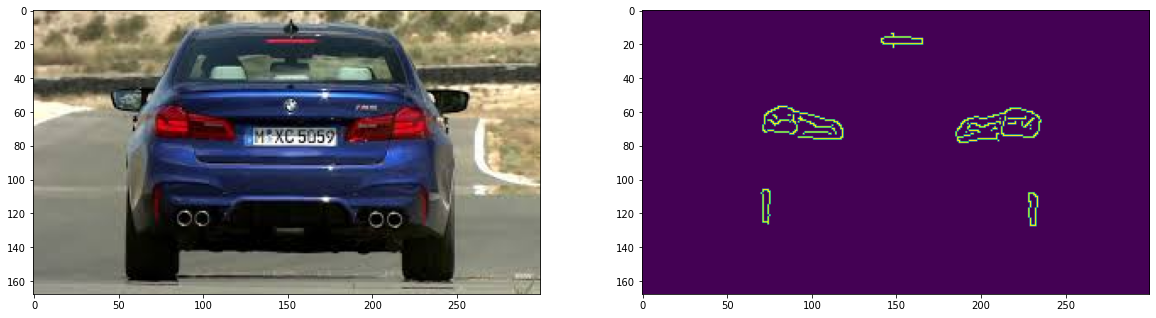

In [116]:
# Raw vs. Hysteresis
f, axarr = plt.subplots(1,2, figsize=(20, 20))
axarr[0].imshow(myraw)
axarr[1].imshow(myhysteresis)

nR:  168
nC:  300
len(x):  591
count:  1
current_maxx:  147
current_minx:  147
current_maxy:  14
current_miny:  14
j:  19
j:  7
i:  9
i:  1
current_maxx:  166
current_minx:  140
current_maxy:  23
current_miny:  13
new len:  532
count:  2
current_maxx:  80
current_minx:  80
current_maxy:  57
current_miny:  57
j:  39
j:  10
i:  20
i:  1
current_maxx:  119
current_minx:  70
current_maxy:  77
current_miny:  56
new len:  322
count:  3
current_maxx:  217
current_minx:  217
current_maxy:  58
current_miny:  58
j:  19
j:  33
i:  21
i:  1
current_maxx:  236
current_minx:  184
current_maxy:  79
current_miny:  57
new len:  93
count:  4
current_maxx:  71
current_minx:  71
current_maxy:  106
current_miny:  106
j:  5
j:  2
i:  21
i:  1
current_maxx:  76
current_minx:  69
current_maxy:  127
current_miny:  105
new len:  47
count:  5
current_maxx:  228
current_minx:  228
current_maxy:  108
current_miny:  108
j:  6
j:  1
i:  20
i:  1
current_maxx:  234
current_minx:  227
current_maxy:  128
current_miny: 

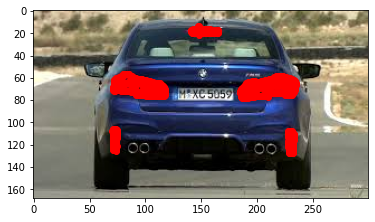

In [123]:
# Try to get the rectangle surrounding the objects
x, y = [], []
minx = []
maxx = []
miny = []
maxy = []

nR, nC = mygraysmoothimg.shape
max_obj_width = 100
max_obj_height = 50

print("nR: ", nR)
print("nC: ", nC)

for i in range(nR):
    for j in range(nC):
        if np.abs(myhysteresis[i,j]) > 200:
            x.append(j)
            y.append(i)
            
print("len(x): ", len(x))


tmpx = np.copy(x)
tmpy = np.copy(y)

count = 1

while len(tmpx)>0:
# for k in range(1):

    print("count: ", count)
    
    current_maxx = tmpx[0]
    current_maxy = tmpy[0]
    current_minx = tmpx[0]
    current_miny = tmpy[0]
    
    current_x = tmpx[0]
    current_y = tmpy[0]
    
    print("current_maxx: ", current_maxx)
    print("current_minx: ", current_minx)
    print("current_maxy: ", current_maxy)
    print("current_miny: ", current_miny)
    
    
    # get the maxx
    for j in range(int(max_obj_width/2)):
        isfound = 0
        for i in range(-int(max_obj_height/2),int(max_obj_height/2)):
            if myhysteresis[current_y + i, current_x + j] > 200:
                isfound = 1
                break
        if isfound == 0:
            print("j: ", j)
            current_maxx = current_maxx + j
            break
        elif isfound == 1 and j == int(max_obj_width/2) - 1:
            print("j: ", j)
            current_maxx = current_maxx + j
            
    
    # get the min x
    for j in range(int(max_obj_width/2)):
        isfound = 0
        for i in range(-int(max_obj_height/2),int(max_obj_height/2)):
            if myhysteresis[current_y + i, current_x - j] > 200:
                isfound = 1
                break
        if isfound == 0:
            print("j: ", j)
            current_minx = current_minx - j
            break
        elif isfound == 1 and j == int(max_obj_width/2) - 1:
            print("j: ", j)
            current_minx = current_minx - j
    
    
    # get the maxy
    for i in range(int(max_obj_height/2)):
        isfound = 0
        for j in range(-int(max_obj_width/2),int(max_obj_width/2)):
            if myhysteresis[current_y + i, current_x + j] > 200:
                isfound = 1
                break
        if isfound == 0:
            print("i: ", i)
            current_maxy = current_maxy + i
            break
        elif isfound == 1 and i == int(max_obj_height/2) - 1:
            print("i: ", i)
            current_maxy = current_maxy + i
            
    # get the miny
    for i in range(int(max_obj_height/2)):
        isfound = 0
        for j in range(-int(max_obj_width/2),int(max_obj_width/2)):
            if myhysteresis[current_y - i, current_x + j] > 200:
                isfound = 1
                break
        if isfound == 0:
            print("i: ", i)
            current_miny = current_miny - i
            break
        elif isfound == 1 and i == int(max_obj_height/2) - 1:
            print("i: ", i)
            current_miny = current_miny - i
    
    
    print("current_maxx: ", current_maxx)
    print("current_minx: ", current_minx)
    print("current_maxy: ", current_maxy)
    print("current_miny: ", current_miny)
    
    minx.append(current_minx)
    maxx.append(current_maxx)
    miny.append(current_miny)
    maxy.append(current_maxy)
    
    # Remove the current object
    newx = []
    newy = []
    
    for i in range(len(tmpx)):
        if tmpx[i] > current_maxx or tmpx[i] < current_minx or tmpy[i] > current_maxy or tmpy[i] < current_miny:
            newx.append(tmpx[i])
            newy.append(tmpy[i])
            
    tmpx = newx
    tmpy = newy
    
    print("new len: ", len(newx))
    count = count + 1


plt.imshow(myraw)
plt.autoscale(False)
plt.plot(x,y, 'ro')

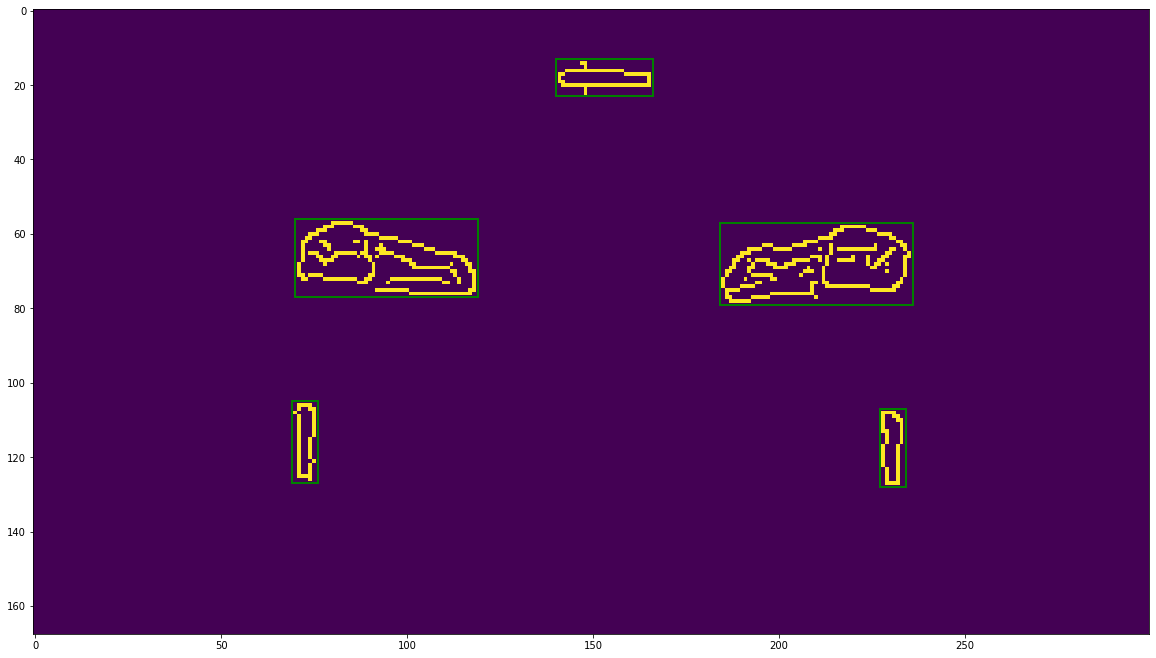

In [124]:
# Raw vs. Hysteresis
import matplotlib
f, axarr = plt.subplots(1,1, figsize=(20, 20))
axarr.imshow(myhysteresis)
for i in range(len(minx)):
    current_minx = minx[i]
    current_maxx = maxx[i]
    current_miny = miny[i]
    current_maxy = maxy[i]
    delta_x = current_maxx - current_minx
    delta_y = current_maxy - current_miny
    axarr.add_patch( matplotlib.patches.Rectangle((current_minx, current_miny),
                        delta_x, delta_y, fc ='none', 
                        ec ='g',
                        lw = 2) )

3
4
